# Libraries and Dataset



**Importing all the required libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set_palette("husl")

**Loading the dataset**

In [2]:
!unzip -q /content/diabetes_dataset.zip -d /content/diabetes_dataset
# Load up our diabetes dataset
diabetes_data = pd.read_csv('/content/diabetes_dataset/diabetes_dataset.csv')

# Explortary Data Analysis and Visualization


In [3]:
print(f"The dataset has {diabetes_data.shape[0]} patients(records) and {diabetes_data.shape[1]} measurements (Fields)")
print(f"Feature Columns: {list(diabetes_data.columns)}")


# Data summary
print("\n" + "="*50)
print("Data summary:")
print("="*50)
print(diabetes_data.describe())

#Showing the first and last five records
print("\n" + "="*50)
print("First five patients in our dataset:")
print("="*50)
print(diabetes_data.head(5))


print("\n" + "="*50)
print("Last five patients in our dataset:")
print("="*50)
print(diabetes_data.tail(5))


# Checking if there are records with null values
print("\n" + "="*50)
print("\nChecking fields with empty values\n")
print("\n" + "="*50)
print(diabetes_data.isnull().sum())




The dataset has 768 patients(records) and 9 measurements (Fields)
Feature Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Data summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000     

Outcome
0    500
1    268
Name: count, dtype: int64


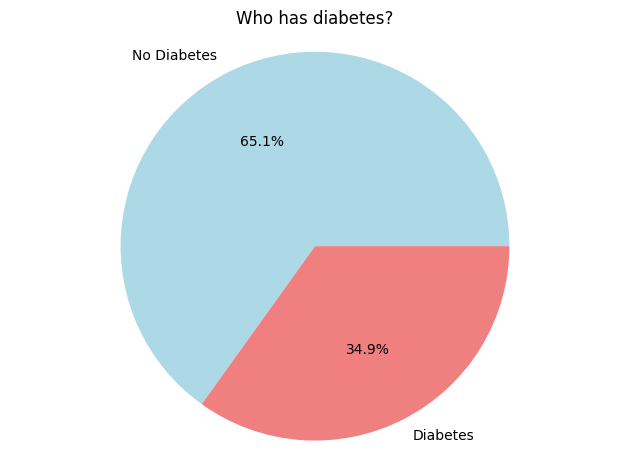

In [4]:
# Visualizing how many people have diabetes vs not
fig, ax = plt.subplots()

# Visualizing how many people have diabetes vs not
diabetes_counts = diabetes_data['Outcome'].value_counts()
print(diabetes_counts)
ax.pie(diabetes_counts.values, labels=['No Diabetes', 'Diabetes'],
       autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
ax.set_title('Who has diabetes?')
ax.axis('equal')  # Ensures the pie chart is circular

sns.despine(left=True)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'How measurements relate')

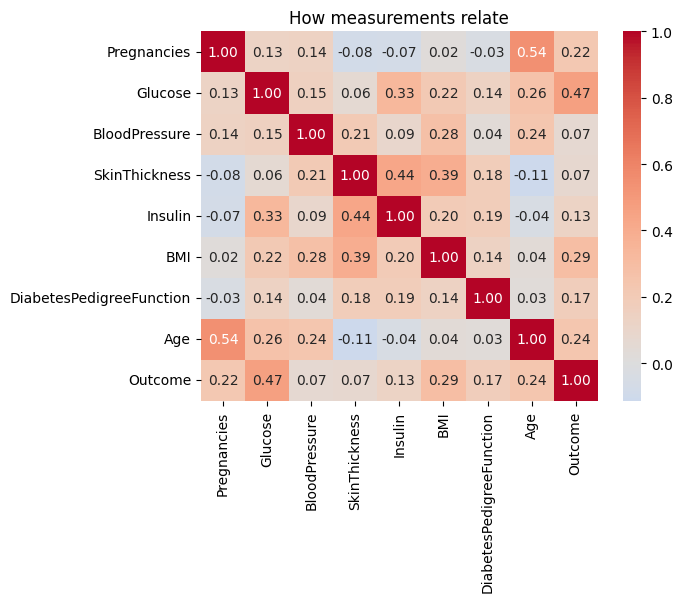

In [5]:

fig, ax = plt.subplots()

# Checking how different measurements relate to each other
correlation_map = diabetes_data.corr()
sns.heatmap(correlation_map, annot=True, cmap='coolwarm', center=0, ax=ax, fmt='.2f')
ax.set_title('How measurements relate')


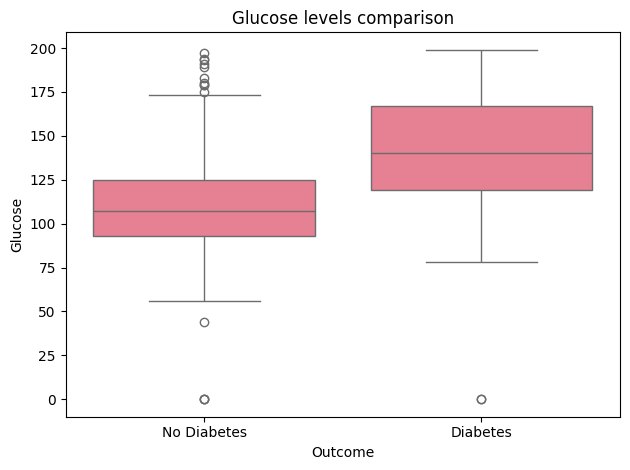

In [6]:
# Comparing glucose levels between groups
fig, ax = plt.subplots()

sns.boxplot(x='Outcome', y='Glucose', data=diabetes_data, ax=ax)
ax.set_title('Glucose levels comparison')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

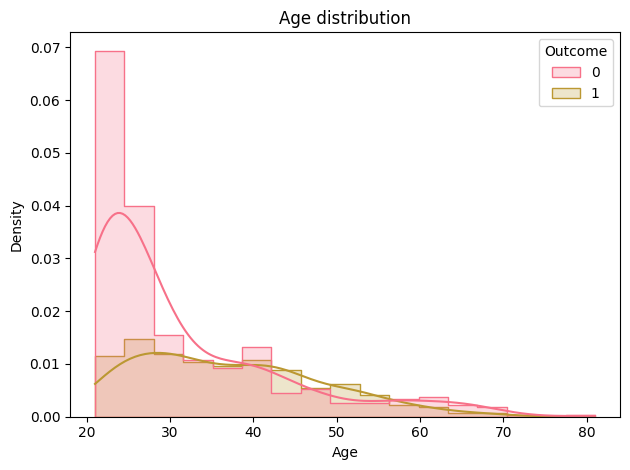

In [7]:
# Looking at age distribution
fig, ax = plt.subplots()
sns.histplot(data=diabetes_data, x='Age', hue='Outcome', kde=True,
             ax=ax, element='step', stat='density')
ax.set_title('Age distribution')
plt.tight_layout()
plt.show()

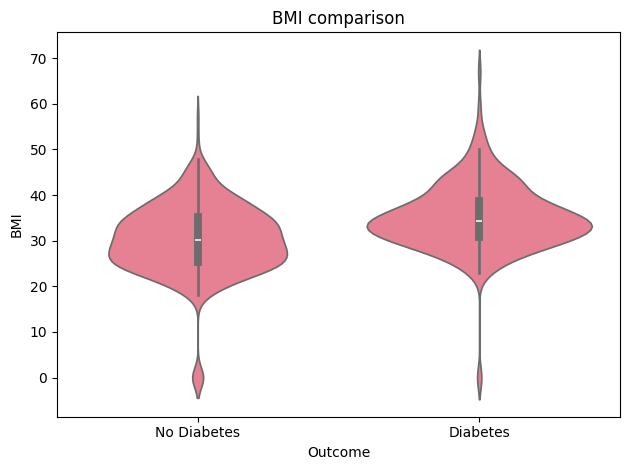

In [8]:
# BMI comparison
fig, ax = plt.subplots()
sns.violinplot(x='Outcome', y='BMI', data=diabetes_data, ax=ax)
ax.set_title('BMI comparison')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()

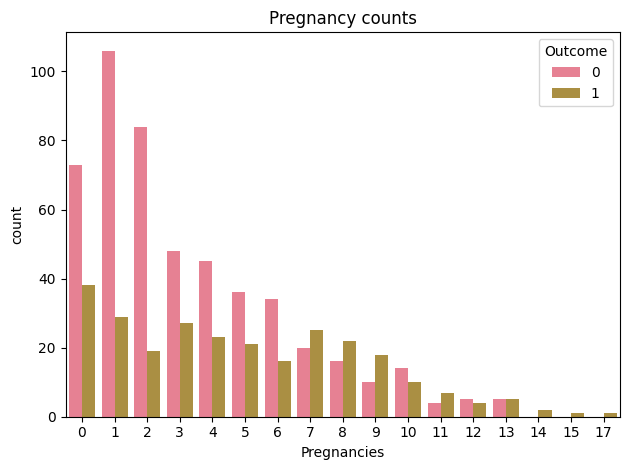

In [9]:
# Pregnancy counts
fig, ax = plt.subplots()
sns.countplot(x='Pregnancies', hue='Outcome', data=diabetes_data, ax=ax)
ax.set_title('Pregnancy counts')
plt.tight_layout()
plt.show()

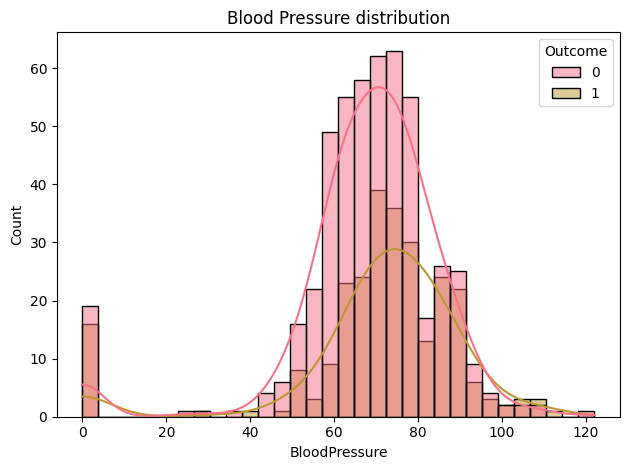

In [10]:
# Blood Pressure distribution
fig, ax = plt.subplots()
sns.histplot(data=diabetes_data, x='BloodPressure', hue='Outcome', kde=True, ax=ax)
ax.set_title('Blood Pressure distribution')
plt.tight_layout()
plt.show()

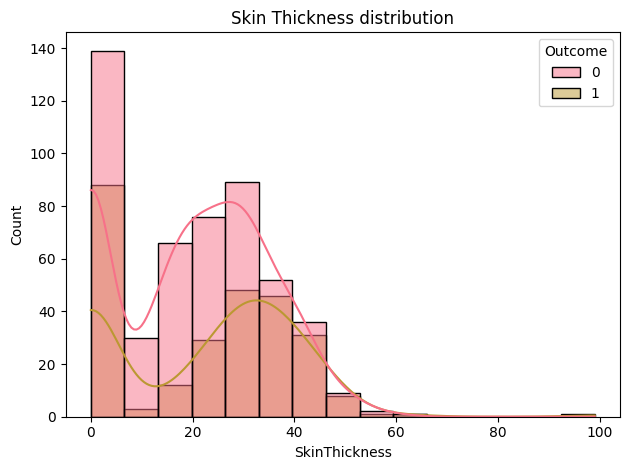

In [11]:
# Skin Thickness distribution
fig, ax = plt.subplots()
sns.histplot(data=diabetes_data, x='SkinThickness', hue='Outcome', kde=True, ax=ax)
ax.set_title('Skin Thickness distribution')
plt.tight_layout()
plt.show()

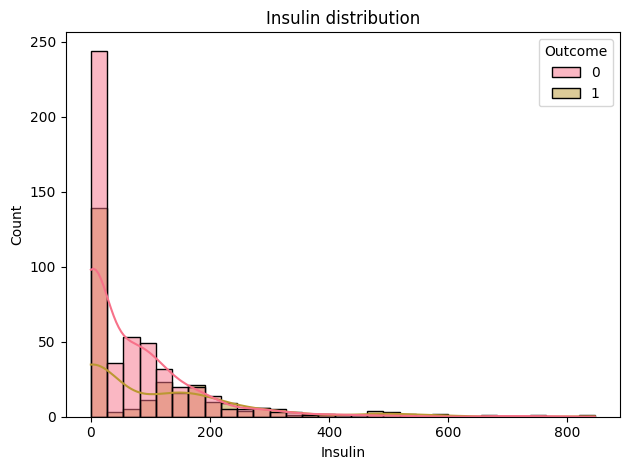

In [12]:
# Insulin distribution
fig, ax = plt.subplots()
sns.histplot(data=diabetes_data, x='Insulin', hue='Outcome', kde=True, ax=ax)
ax.set_title('Insulin distribution')
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

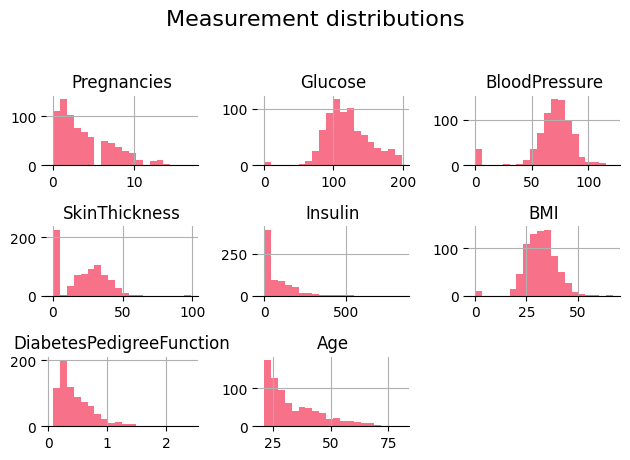

In [13]:
# Distributions of all measurements (feature columns)
measurements = diabetes_data.drop('Outcome', axis=1) # Removing the target feature(column)

plt.figure(figsize=(15, 8))
measurements.hist(bins=20, layout=(3, 3))
plt.suptitle('Measurement distributions', fontsize=16)

sns.despine(left=True)

# Tight layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Data Preparation and Preprocessing

**Feature columns and target column**

In [14]:
# Data Imputation
df = diabetes_data.copy()

# Columns with unrealistic values
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Iterate over each column and replace zeros (medically unrealistic values) with the column's median
for col in cols_to_impute:
    median_val = df[col].median()
    df.loc[df[col] == 0, col] = median_val
# features (X) and target (y)
X_measurements = df.drop('Outcome', axis=1)
y_diabetes_status = df['Outcome']

#  Undersampling the majority class to avoid bias
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_measurements, y_diabetes_status = rus.fit_resample(X_measurements, y_diabetes_status)

print(f"There are {X_measurements.shape[1]} measurements for each patient")
print(f"Predicting diabetes status for {len(y_diabetes_status)} patients")

/tmp/ipython-input-310589400.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] == 0, col] = median_val


There are 8 measurements for each patient
Predicting diabetes status for 536 patients


**Standardizing Data**

In [15]:
# Standardize the measurements so they're all on similar scales
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_measurements)
# Scaled measurements.
print("Scaled measurements:")
print(X_scaled[:5])

Scaled measurements:
[[-0.90454108 -0.920869   -0.22189558  1.33084261 -0.61026362  0.74699822
  -0.78899256 -0.35671129]
 [ 0.25882789 -1.52614394 -2.01163069 -0.50903569 -0.61026362  0.09341981
   0.44216562 -0.79685229]
 [-0.32285659 -0.47487694 -1.19811473  0.35678939 -0.48397148 -0.53045049
  -0.19035601 -1.06093688]
 [-0.61369883  0.09854142  0.91702675 -0.50903569 -0.61026362 -0.75326131
  -0.60262458 -0.62079589]
 [ 0.84051237 -0.76158612  0.1035108   1.33084261  0.08668185  0.61331173
  -0.82852516  0.96371171]]


# Training the Model

In [16]:
# Split our data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_diabetes_status,
    test_size=0.2,
    stratify=y_diabetes_status,
    random_state=42
)

# Model training
diabetes_model = RandomForestClassifier(n_estimators=100,max_depth=5, min_samples_leaf=5, random_state=42)

print("Training the model...")
diabetes_model.fit(X_train, y_train)

Training the model...


RandomForestClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

# Model Performance Evaluation

Training accuracy RF: 0.860 (86.0%)
Test accuracy RF: 0.769 (76.9%)

Detailed performance report:
              precision    recall  f1-score   support

 No Diabetes       0.78      0.74      0.76        54
    Diabetes       0.75      0.80      0.77        54

    accuracy                           0.77       108
   macro avg       0.77      0.77      0.77       108
weighted avg       0.77      0.77      0.77       108



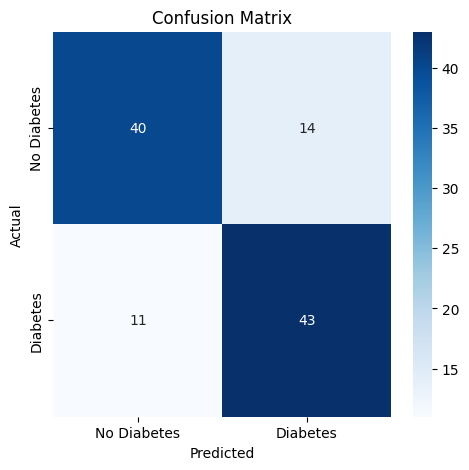

In [17]:
# Accuracy on training data
train_predictions_rf = diabetes_model.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)


# Accuracy on test data (new data)
test_predictions_rf = diabetes_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)


print(f"Training accuracy RF: {train_accuracy_rf:.3f} ({train_accuracy_rf*100:.1f}%)") # Percentage accuracy
print(f"Test accuracy RF: {test_accuracy_rf:.3f} ({test_accuracy_rf*100:.1f}%)")



# Classification Report RF
print("\nDetailed performance report:")
print(classification_report(y_test, test_predictions_rf,
                            target_names=['No Diabetes', 'Diabetes']))

# Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
confusion = confusion_matrix(y_test, test_predictions_rf)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


**Feature Importance**


Which measurements matter most for prediction:
                Measurement  Importance
1                   Glucose    0.404557
5                       BMI    0.166437
7                       Age    0.141113
0               Pregnancies    0.074693
2             BloodPressure    0.069329
6  DiabetesPedigreeFunction    0.062090
3             SkinThickness    0.046192
4                   Insulin    0.035589


/tmp/ipython-input-3953127770.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Measurement', data=importance_scores, palette='viridis')


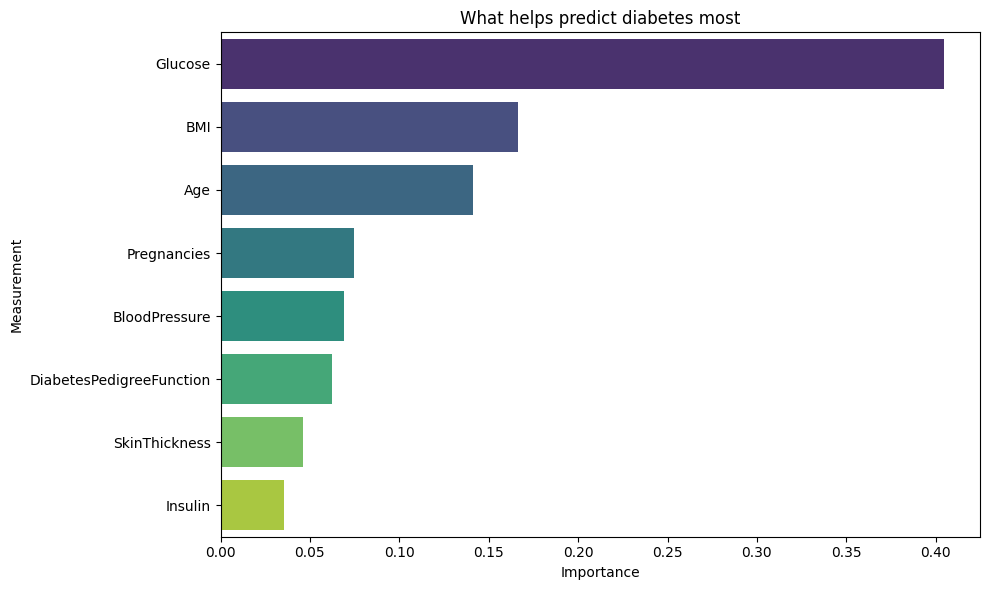

In [18]:
# Most important for measurements prediction

if hasattr(diabetes_model, 'feature_importances_'):
    importance_scores = pd.DataFrame({
        'Measurement': X_measurements.columns,
        'Importance': diabetes_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nWhich measurements matter most for prediction:")
    print(importance_scores)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Measurement', data=importance_scores, palette='viridis')
    plt.xlabel('Importance')
    plt.ylabel('Measurement')
    plt.title('What helps predict diabetes most')
    plt.tight_layout()
    plt.show()

# Model Application for user inputs

In [ ]:
print("Enter patient data to make a prediction.")
print("Please enter the following 8 measurements as numbers:")

# List of measurements to prompt the user for
measurement_labels = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]

user_patient_info = []
for label in measurement_labels:
    while True:
        try:
            value = float(input(f"Enter {label}: "))
            user_patient_info.append(value)
            break
        except ValueError:
            print("Invalid input. Please enter a number.")

print("\nMaking prediction for the entered patient...\n")

# Prepare the patient data
patient_array = np.array(user_patient_info).reshape(1, -1)
scaled_patient = scaler.transform(patient_array)

# Get prediction and probabilities
prediction = diabetes_model.predict(scaled_patient)
probabilities = diabetes_model.predict_proba(scaled_patient)

# Show results
result = "Diabetes" if prediction[0] == 1 else "No Diabetes"
confidence_percentage = np.max(probabilities) * 100

print(f"Prediction: {result}")
print(f"Confidence: {confidence_percentage:.2f}%")



Enter patient data to make a prediction.
Please enter the following 8 measurements as numbers:
